# <b>A. <span style='color:#0B2F9F'><code>PREFIX</code></span></b>
Prefix merupakan penggunaan awalan pada nama tabel untuk memberikan informasi tambahan atau untuk mengelompokkan objek-objek tertentu. Sebagai contoh perhatikan gambar berikut : <br><br>

<img src="https://raw.githubusercontent.com/bachtiyarma/Material/refs/heads/main/Image/Materi-SQL/SQL%20-%20Prefix.png" width="50%">

<br><br>
Nama tabel dimisalkan (diberi alias) sebagai tbl, lalu untuk mengakses kolom pada tabel tersebut bisa diberi prefix tbl.kolom1 dan seterusnya

#### <i><b><span style='color:#55679C'>Quest</span> : Pada tabel customer_demography, ambil kolom customer_id, gender, age dan married namun gunakan alias 'cdm' pada nama tabel dan sematkan prefixnya saat mengakses kolom!</b></i>

In [ ]:
select cdm.customer_id, cdm.gender, cdm.age,cdm.married
from `Telco_chum.customer _demography` as cdm

customer_id,gender,age,married
8779-QRDMV,Male,78,No
7495-OOKFY,Female,74,Yes
1658-BYGOY,Male,71,No
4598-XLKNJ,Female,78,Yes
4846-WHAFZ,Female,80,Yes
4412-YLTKF,Female,72,No
0390-DCFDQ,Female,76,Yes
3445-HXXGF,Male,66,Yes
2656-FMOKZ,Female,70,No
2070-FNEXE,Female,77,No


# <b>B. <span style='color:#0B2F9F'><code>JOIN</code></span></b>

Data biasanya disimpan di berbagai tabel atau sistem yang berbeda pada RDBMS (Relational Database Management System). JOIN memungkinkan pengguna untuk menggabungkan data dari berbagai sumber untuk mendapatkan gambaran yang lebih lengkap. Memahami query JOIN memungkinkan seorang pengguna untuk mengintegrasikan dan menganalisis data secara efektif, sehingga dapat meningkatkan kualitas analisis dan mendukung pengambilan keputusan berbasis data.

Operasi JOIN standar dapat dilakukan jika terdapat kunci pada tiap tabel yang saling terhubung. Operasi join dasar yang paling umum digunakan ada 4 yakni :
<ul>
    <li><b>LEFT JOIN</b></li>
    LEFT JOIN adalah jenis operasi penggabungan baris dari dua tabel, tetapi hanya mengembalikan semua baris dari tabel kiri (tabel pertama) dan baris yang cocok dari tabel kanan (tabel kedua). Jika tidak ada kecocokan di tabel kanan, maka nilai-nilai untuk kolom dari tabel kanan akan diisi dengan NULL.<br><br>
    <img src="https://thomasadventure.blog/img/left-join-extra.gif" width="20%">
    <br><br>
    <li><b>RIGHT JOIN</b></li>
    RIGHT JOIN adalah jenis operasi penggabungan baris dari dua tabel, tetapi hanya mengembalikan semua baris dari tabel kanan (tabel kedua) dan baris yang cocok dari tabel kiri (tabel pertama). Jika tidak ada kecocokan di tabel kiri, maka nilai-nilai untuk kolom dari tabel kiri akan diisi dengan NULL.<br><br>
    <img src="https://thomasadventure.blog/img/right-join.gif" width="20%">
    <br><br>
    <li><b>INNER JOIN</b></li>
    INNER JOIN adalah jenis operasi penggabungan yang hanya mengembalikan baris yang memiliki kecocokan di kedua tabel berdasarkan kriteria tertentu.<br><br>
    <img src="https://thomasadventure.blog/img/inner-join.gif" width="20%">
    <br><br>
     <li><b>FULL JOIN</b></li>
    FULL JOIN adalah jenis operasi penggabungan semua baris dari kedua tabel, baik yang memiliki kecocokan maupun yang tidak. Dengan demikian, hasilnya akan mencakup semua data dari tabel kiri dan tabel kanan.<br><br>
    <img src="https://thomasadventure.blog/img/full-join.gif" width="20%">
    <br><br>
</ul>

#### <i><b><span style='color:#55679C'>Pre-Quest</span>
Untuk melakukan join biasanya akan lebih mudah jika arsitektur relasi antar tabel atau biasa dikenal ERD (Entity Relational Diagram) telah dibuat atau diketahui. Pada data telco churn ERD-nya disajikan pada gambar berikut<br><br>

<img src="https://raw.githubusercontent.com/bachtiyarma/Material/refs/heads/main/Image/Materi-SQL/ERD%20-%20Telco%20Churn.png" width="40%">

#### <i><b><span style='color:#55679C'>Quest : </span>Hitung berapa rata-rata biaya bulanan tiap status customer! Tampilkan status, total_customer, avg_monthly_charge! Interpretasikan insight dari hasil perhitungan!

In [ ]:
select
  sts.status,
  count(srv.customer_id) as total_customer,
  round(avg(srv.monthly_charge),2) as avg_monthly_charge
from `Telco_chum.customer_status`sts
left join `Telco_chum.telco_services` srv on sts.customer_id = srv.customer_id
group by sts.status

status,total_customer,avg_monthly_charge
Churned,1869,74.44
Joined,454,43.47
Stayed,4720,62.98


<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
Didapatkan bahwa blablbal

#### <i><b><span style='color:#55679C'>Quest : </span>Coba Sudut Pandang Lebih Luas; Hitung berapa banyak customer, rata-rata biaya bulanan & rata-rata umur tiap status customer, gender dan status pernikahannya! Tampilkan status, gender, married, total_customer, avg_monthly_charge! Urutkan hasilnya per metrik perhitungan dan Interpretasikan insight dari hasil perhitungan!

In [ ]:
SELECT
  c.status,
  b.gender,
  b.married,
  COUNT(a.customer_id) AS total_customer,
  AVG(a.monthly_charge) AS avg_monthly_charge,
FROM Telco_chum.telco_services a
INNER JOIN `Telco_chum.customer _demography` b ON a.customer_id = b.customer_id
INNER JOIN Telco_chum.customer_status c ON c.customer_id = a.customer_id
GROUP BY c.status, b.gender, b.married
ORDER BY c.status, b.gender, b.married

status,gender,married,total_customer,avg_monthly_charge
Churned,Female,Yes,319,78.0
Churned,Female,No,620,73.17
Churned,Male,Yes,350,81.45
Churned,Male,No,580,69.61
Joined,Female,Yes,46,43.75
Joined,Female,No,165,43.47
Joined,Male,Yes,38,48.11
Joined,Male,No,205,42.55
Stayed,Female,Yes,1323,64.67
Stayed,Female,No,1015,61.51


<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
...

#### <i><b><span style='color:#55679C'>Quest : </span>Bagaimana dengan total tenure ? Hitung berapa rata-rata tenure_in_month tiap status customer! Tampilkan status, total_customer, avg_tenure_in_month! Interpretasikan insight dari hasil perhitungan!

In [ ]:
select
 sts.status,
 count(srv.customer_id)as total_customer,
 round(avg(srv.tenure_in_months),2) as avg_tenure_in_month
from `Telco_chum.telco_services` as srv
left join `Telco_chum.customer_status`sts on srv.customer_id = sts.customer_id
group by sts.status

status,total_customer,avg_tenure_in_month
Churned,1869,17.98
Joined,454,1.72
Stayed,4720,41.04


<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
...

#### <i><b><span style='color:#55679C'>Quest : </span>Perusahaan telekomunikasi ingin melakukan perluasan market ke beberapa daerah yang mana di daerah tersebut belum ada pelanggan terdaftar dalam database. Buatkan daftar kode pos pada tabel population yang sama sekali belum ada orang yang menggunakan layanan telekomunikasi! Tampilkan kode pos dan jumlah populasinya!

In [ ]:
SELECT DISTINCT
  l.zip_code AS zip_code_from_cust,
  p.zip_code,
  p.population
FROM Telco_chum.customer_location AS l
RIGHT JOIN Telco_chum.population AS p ON l.zip_code = p.zip_code
WHERE l.zip_code IS NULL;

zip_code,population,total_customer
91402,66249,0
95023,47514,0
90020,42394,0
92307,31876,0
93555,29782,0
95531,23792,0
92277,17178,0
96161,15783,0
93640,9174,0
96064,4592,0




#### <i><b><span style='color:#55679C'>Quest 1 : </span> Berapa rata-rata nilai CLTV untuk setiap kategori churn?

In [ ]:
SELECT churn_category, ROUND(AVG(cltv), 2) AS avg_cltv
FROM `Telco_chum.customer_status`
GROUP BY churn_category
ORDER BY avg_cltv DESC;

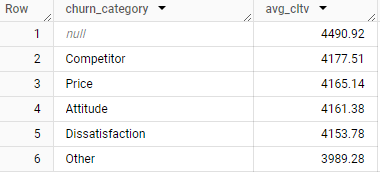

<b><span style='color:#FFDB00'><i>Interpretasi Hasil :menunjukkan bahwa pelanggan dengan nilai CLTV tinggi cenderung berpindah ke kompetitor, bukan karena harga atau ketidakpuasan. </i></span></b><br>

#### <i><b><span style='color:#55679C'>Quest 2 : </span> Kota mana yang memiliki jumlah pelanggan churn tertinggi?

In [ ]:
SELECT cl.city, COUNT(cs.customer_id) AS jumlah_churn
FROM `Telco_chum.customer_status` cs
JOIN `Telco_chum.customer_location` cl ON cs.customer_id = cl.customer_id
GROUP BY cl.city
ORDER BY jumlah_churn DESC
limit 1

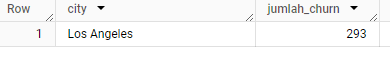

<b><span style='color:#FFDB00'><i>Interpretasi Hasil : Kualitas layanan di Los Angeles mungkin lebih rendah, seperti jaringan tidak stabil atau harga lebih mahal dibanding kota lain. Perusahaan perlu menganalisis lebih dalam penyebab churn di LA, misalnya dengan feedback pelanggan. </i></span></b><br>


---
Powered by : <br>
<img src="https://lh3.googleusercontent.com/ayfbbgvQolM_Ys9VYRVFD6FjDJXSebI9sN1VtY4ppp65dXepA6JCKgKMM_porWAErGQmc8l-L_RXq080SJ3FbYTIsyxYqWWTuAX8A3VtafWLUwAnnxNnjR1s-3BMCUlF34fYnViLuutxrLm3nEpoix0" width="20%">
<br><br>
<a href="https://www.linkedin.com/in/raihan-wahyudi-putra-898282216?originalSubdomain=id"><img src="https://img.shields.io/badge/-© 2024 raihan wahyudi putra-1298AC?style=for-the-badge&logoColor=white"/></a>